###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
dataset = datasets.load_iris()
print(dataset.feature_names, end="\n")
print(dataset.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
# Select only two feature to work with
features = [2,3]
X = dataset.data[:,features]
y = dataset.target

In [4]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
# Fitting Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train,y_train)
print(classifier.sigma_,end="\n")
print(classifier.theta_)

[[0.02484429 0.01118512]
 [0.2264     0.04124375]
 [0.27815097 0.0656579 ]]
[[1.44705882 0.26176471]
 [4.26       1.3225    ]
 [5.50263158 2.05      ]]


In [6]:
# Predicting the training set results
y_pred = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)
print(accuracy_score(y_train,y_pred))

[[34  0  0]
 [ 0 37  3]
 [ 0  2 36]]
0.9553571428571429


In [7]:
# Predicting the test set results
y_pred = classifier.predict(X_test,)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[16  0  0]
 [ 0 10  0]
 [ 0  1 11]]
0.9736842105263158


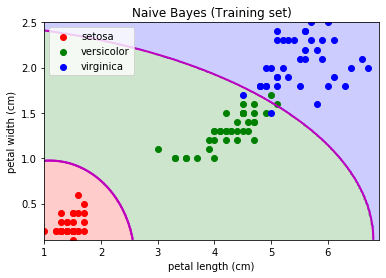

In [8]:
# Visualising the training set results
color_map = ListedColormap(('red', 'green', 'blue'))
pts = 200
x1 = np.linspace(X[:, 0].min(),X[:, 0].max(),pts)
x2 = np.linspace(X[:, 1].min(),X[:, 1].max(), pts)
X1, X2 = np.meshgrid(x1,x2)

obs = np.array([X1.ravel(), X2.ravel()]).T
y_pred = classifier.predict(obs)
plt.contourf(X1, X2, y_pred.reshape(X1.shape), alpha = 0.20, cmap = color_map)
y_prob = classifier.predict_proba(obs)[:,0]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
y_prob = classifier.predict_proba(obs)[:,1]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
for i, value in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == value, 0], X_train[y_train == value, 1],
                c = np.array(color_map(i)).reshape(1,4), label = dataset.target_names[value])
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Training set)')
plt.xlabel(dataset.feature_names[features[0]])
plt.ylabel(dataset.feature_names[features[1]])
plt.legend()
plt.show()

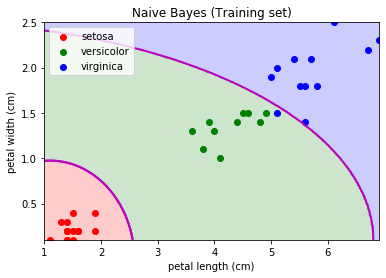

In [9]:
# Visualising the test set results
color_map = ListedColormap(('red', 'green', 'blue'))
pts = 200
x1 = np.linspace(X[:, 0].min(),X[:, 0].max(),pts)
x2 = np.linspace(X[:, 1].min(),X[:, 1].max(), pts)
X1, X2 = np.meshgrid(x1,x2)

obs = np.array([X1.ravel(), X2.ravel()]).T
y_pred = classifier.predict(obs)
plt.contourf(X1, X2, y_pred.reshape(X1.shape), alpha = 0.20, cmap = color_map)
y_prob = classifier.predict_proba(obs)[:,0]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
y_prob = classifier.predict_proba(obs)[:,1]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
for i, value in enumerate(np.unique(y_train)):
    plt.scatter(X_test[y_test == value, 0], X_test[y_test == value, 1],
                c = np.array(color_map(i)).reshape(1,4), label = dataset.target_names[value])
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Training set)')
plt.xlabel(dataset.feature_names[features[0]])
plt.ylabel(dataset.feature_names[features[1]])
plt.legend()
plt.show()